# 2022 Data Wrangling Project

- Name : Kanghee Lee(kle510)
- Name : 

### Contents
- 1. Introduction
- 2. Datasets used
- 3. Proprocessing dataset
- 4. Validation
- 5. Data Analytics
- 6. Conclusion

### Packaes used

In [1]:
import numpy as np
import pandas as pd
import scipy
pd.set_option('display.max_columns', None)
%matplotlib inline

import re

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns

from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.error   import HTTPError
from urllib.error   import URLError

import requests
import csv

## 1. Introduction

The question that we want to address in this project is that “Which league is the best soccer league according to the FIFA22 dataset”. There are 5 major leagues in Europe which are Spain, England, France, Germany, and Italy. Before we mention sub-questions, we had to check whether we can trust the data from FIFA22. There are no such real-life digitized data. So, we must confirm that there is a correlation between “overall” and real-life data such as the league table of 5 major leagues from last season, or even FIFA International Ranking.
After confirming the correlation, we want to approach it from multiple points of view. In the aspect of value, potential, BMI, nationality, and international reputation, we want to find out which league is the best.

<hr style="border:1.5px solid gray"> </hr>

## 2. Dataset
- totally three different type of datset
    - a. FIFA2022(game) dataset from the game in beginning of 2022(This dataset is based on the results from 2021)
    - b. League table of 5 best leagues in Europe 2021
    - c. FIFA world ranking by nation

### 2.a. Crawling the FIFA2022(game) datset from www.sofifa.com
- we only extract the columns that we need
- and save it as csv file with appropriate column names

In [2]:
# f = open('fifa2022.csv','w', newline='')
# wr = csv.writer(f)

# wr.writerow(['Id','Name','Age','Nationality','Team','Height','Weight',
#              'Overall','Potential','Best position','Value','Wage',
#              'International Reputation'])

# for offset in range(0,319):
#     url = 'https://sofifa.com/players?type=all&r=220001&set=true&showCol%5B%5D=pi&showCol%5B%5D=ae&showCol%5B%5D=hi&showCol%5B%5D=wi&showCol%5B%5D=pf&showCol%5B%5D=oa&showCol%5B%5D=pt&showCol%5B%5D=bo&showCol%5B%5D=bp&showCol%5B%5D=gu&showCol%5B%5D=jt&showCol%5B%5D=le&showCol%5B%5D=vl&showCol%5B%5D=wg&showCol%5B%5D=tt&showCol%5B%5D=bs&showCol%5B%5D=ir&offset='
#     url += str(offset*60) 
    
#     webpage = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
#     soup = BeautifulSoup(webpage.text,'html.parser')
#     trs = soup.select('tbody>tr')
#     for tr in trs:
#         player_id = tr.select('td.col-pi')[0].text
#         name = tr.select('.ellipsis')[0].text
#         team = tr.select('td.col-name')[1].select('a')[0].text
#         contract = tr.select('td.col-name')[1].select('.sub')[0].text
#         nationality = tr.select('td.col-name > img')[0]['title']
#         age = tr.select('td.col.col-ae')[0].text
#         height = tr.select('td.col.col-hi')[0].text
#         weight = tr.select('td.col.col-wi')[0].text
#         ova = tr.select('td.col.col-oa')[0].text
#         potential = tr.select('td.col.col-pt')[0].text
#         best_position = tr.select('td.col.col-bp')[0].text
#         value = tr.select('td.col.col-vl')[0].text
#         wage = tr.select('td.col.col-wg')[0].text
#         international_ranking = tr.select('td.col.col-ir')[0].text
#         wr.writerow([player_id,name,age,nationality,team,height,
#                     weight,ova,potential,best_position,
#                     value,wage,international_ranking])
# f.close()

In [3]:
# load datset fifa.csv
fifa = pd.read_csv('fifa2022.csv')

# display first 5 of fifa datset
fifa.head()

,Id,Name,Age,Nationality,Team,Height,Weight,Overall,Potential,Best position,Value,Wage,International Reputation
0,158023,L. Messi,34,Argentina,Paris Saint-Germain,170cm,72kg,93,93,RW,€78M,€320K,5
1,188545,R. Lewandowski,32,Poland,FC Bayern München,185cm,81kg,92,92,ST,€119.5M,€270K,5
2,231747,K. Mbappé,22,France,Paris Saint-Germain,182cm,73kg,91,95,ST,€194M,€230K,4
3,200389,J. Oblak,28,Slovenia,Atlético de Madrid,188cm,87kg,91,93,GK,€112M,€130K,5
4,192985,K. De Bruyne,30,Belgium,Manchester City,181cm,70kg,91,91,CM,€125.5M,€350K,4


### 2.b. Downloading league table of 5 best leagues in Europe 2021 from www.sofifa.com
- used read_html
- just extract rename some columns because all of the dataset except the 'Team name' is integer


In [4]:
url_list = {'Germany':'https://sofifa.com/team/21/fc-bayern-munchen/live?r=210064&set=true',
            'England':'https://sofifa.com/team/1/arsenal/live?r=210064&set=true',
            'Spain':'https://sofifa.com/team/241/fc-barcelona/live?r=210064&set=true',
            'Italy':'https://sofifa.com/team/47/ac-milan/live?r=210064&set=true',
            'France':'https://sofifa.com/team/73/paris-saint-germain/live?r=210064&set=true'}

league_table = {}

for league,url in url_list.items():
    print(url)
    webpage = requests.get(url, headers={'User-Agent':'Chrome/66.0.3359.181'})
    tables = pd.read_html(webpage.content,encoding='UTF-8')
    league_table[league] = tables[0]
    
def extract_and_rename_column(x):
    table = x.droplevel(level=0,axis=1)
    table.columns = range(table.columns.size)
    table = table[[0,2,3,4,6,7,8,9,10,11]]
    table.columns = ['Rank','Team','Points','GD','Match','Win','Draw','Loss','GF','GA']
    return table

for country,table in league_table.items():
    league_table[country] = extract_and_rename_column(table)

https://sofifa.com/team/21/fc-bayern-munchen/live?r=210064&set=true
https://sofifa.com/team/1/arsenal/live?r=210064&set=true
https://sofifa.com/team/241/fc-barcelona/live?r=210064&set=true
https://sofifa.com/team/47/ac-milan/live?r=210064&set=true
https://sofifa.com/team/73/paris-saint-germain/live?r=210064&set=true


In [5]:
# display league table
display(league_table['Germany'].head())
league_table['Germany'].info()

,Rank,Team,Points,GD,Match,Win,Draw,Loss,GF,GA
0,1,FC Bayern München,78,55,34,24,6,4,99,44
1,2,RB Leipzig,65,28,34,19,8,7,60,32
2,3,Borussia Dortmund,64,29,34,20,4,10,75,46
3,4,VfL Wolfsburg,61,24,34,17,10,7,61,37
4,5,Eintracht Frankfurt,60,16,34,16,12,6,69,53


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    18 non-null     int64 
 1   Team    18 non-null     object
 2   Points  18 non-null     int64 
 3   GD      18 non-null     int64 
 4   Match   18 non-null     int64 
 5   Win     18 non-null     int64 
 6   Draw    18 non-null     int64 
 7   Loss    18 non-null     int64 
 8   GF      18 non-null     int64 
 9   GA      18 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 1.5+ KB


### 2.c. Downloading FIFA nation ranking dataset from www.football-ranking.com 
- used read_html
- only need two columns indicating ranking and name of the nation
- rename column names

In [6]:
tables = pd.read_html('http://www.football-rankings.info/2021/09/fifa-ranking-september-2021-final.html')
fifa_ranking = tables[1].drop(0)[[0,1]]
fifa_ranking.columns = ['Rank','Nationality']
fifa_ranking['Rank'] = fifa_ranking['Rank'].astype(float)

In [7]:
# display FIFA nation ranking 
display(fifa_ranking.head())
fifa_ranking.info()

,Rank,Nationality
1,1.0,Belgium
2,2.0,Brazil
3,3.0,England
4,4.0,France
5,5.0,Italy


<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 1 to 210
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         210 non-null    float64
 1   Nationality  210 non-null    object 
dtypes: float64(1), object(1)
memory usage: 4.9+ KB


<hr style="border:1.5px solid gray"> </hr>

## 3. Preprocessing FIFA2022 dataset
- Two other datset,League table of Best 5 European League and FIFA nation ranking, needs no more preprocessing

### 3.a. NA values
- There are few players who did not succefully make a contract when the FIFA2022 was released

In [8]:
# check missing data
fifa.isna().sum()

Id                           0
Name                         0
Age                          0
Nationality                  0
Team                        78
Height                       0
Weight                       0
Overall                      0
Potential                    0
Best position                0
Value                        0
Wage                         0
International Reputation     0
dtype: int64

In [9]:
fifa[fifa['Team'].isna()]

,Id,Name,Age,Nationality,Team,Height,Weight,Overall,Potential,Best position,Value,Wage,International Reputation
191,184087,T. Alderweireld,32,Belgium,NaN,186cm,81kg,83,83,CB,€0,€0,3
482,197242,G. Krychowiak,31,Poland,NaN,187cm,84kg,80,80,CDM,€0,€0,3
832,187607,A. Dzyuba,32,Russia,NaN,196cm,91kg,78,78,ST,€0,€0,2
1076,200094,M. Ozdoev,28,Russia,NaN,184cm,78kg,77,78,CDM,€0,€0,1
1282,222404,M. Normann,25,Norway,NaN,179cm,75kg,76,82,CDM,€0,€0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16561,263316,C. Chatzigavriel,17,Cyprus,NaN,185cm,80kg,58,84,GK,€0,€0,1
17081,262563,M. Kokkinoftas,18,Cyprus,NaN,179cm,73kg,57,70,CB,€0,€0,1
17711,263251,N. Dimitriou,19,Cyprus,NaN,176cm,69kg,55,69,RM,€0,€0,1
17897,263388,P. Polykarpou,20,Cyprus,NaN,182cm,74kg,55,69,CB,€0,€0,1


In [10]:
# remove the records that include missing dataset
fifa.dropna(axis=0,inplace=True)
fifa.isna().sum()

Id                          0
Name                        0
Age                         0
Nationality                 0
Team                        0
Height                      0
Weight                      0
Overall                     0
Potential                   0
Best position               0
Value                       0
Wage                        0
International Reputation    0
dtype: int64

### 3.b. Height and  Weight columns
- Height and Weight column are in String format with its own unit

In [11]:
display(fifa[['Height','Weight']].head())
fifa[['Height','Weight']].info()

,Height,Weight
0,170cm,72kg
1,185cm,81kg
2,182cm,73kg
3,188cm,87kg
4,181cm,70kg


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19020 entries, 0 to 19097
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Height  19020 non-null  object
 1   Weight  19020 non-null  object
dtypes: object(2)
memory usage: 445.8+ KB


In [12]:
# Height
# get rid of unit string with 'str.replace'
# And change type into int
fifa['Height'] = fifa['Height'].str.replace('cm','').astype(int)

# To clearly show the data, change the column name to Height(cm)
fifa['Height(cm)'] = fifa['Height']
fifa.drop(columns=['Height'],inplace=True)
fifa[['Height(cm)']].head()

,Height(cm)
0,170
1,185
2,182
3,188
4,181


In [13]:
# weight
# get rid of unit string with 'str.replace'
# And change type into int
fifa['Weight'] = fifa['Weight'].str.replace('kg','').astype(int)

# To clearly show the data, change the column name to Weight(kg)
fifa['Weight(kg)'] = fifa['Weight']
fifa.drop(columns=['Weight'],inplace=True)
fifa[['Weight(kg)']].head()

,Weight(kg)
0,72
1,81
2,73
3,87
4,70


### 3.c. Value and Wage columns
- Value and Wage columns are in string format with its own currency and unit
- Unit is not uniform; some values with unit 'M', some values with unit 'K', some values with no unit
- M means million
- K means thousand

In [14]:
display(fifa[['Value','Wage']].head())
display(fifa[['Value']].tail())
fifa[['Value','Wage']].info()

,Value,Wage
0,€78M,€320K
1,€119.5M,€270K
2,€194M,€230K
3,€112M,€130K
4,€125.5M,€350K


,Value
19093,€110K
19094,€110K
19095,€90K
19096,€110K
19097,€100K


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19020 entries, 0 to 19097
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Value   19020 non-null  object
 1   Wage    19020 non-null  object
dtypes: object(2)
memory usage: 445.8+ KB


In [15]:
# Value 
# It is possible to extract string without currency using 'str.extract' and regular expression
# And using 'apply' function, we apply function 'calc_value' to extracted string without currency
# 'calc_value' can calculate the value(float) by unit behind it from the string input.
# For example, if 100M is input, the function returns 100*1,000,000

def calc_value(x):
    if x[-1] == 'M':
        return float(x[:-1])*1000000
    elif x[-1] =='K':
        return float(x[:-1])*1000
    else:
        return float(x)
    
fifa['Value'] = fifa['Value'].str.extract(r'(\d+\.?\d?K?M?)')[0].apply(calc_value)
display(fifa[['Value']].head())

,Value
0,78000000.0
1,119500000.0
2,194000000.0
3,112000000.0
4,125500000.0


In [16]:
# Wage
# Followed excatly same procedure as above for 'Value' column
def calc_wage(x):
    if x[-1] == 'K':
        return float(x[:-1])*1000
    else:
        return float(x)
fifa['Wage'] = fifa['Wage'].str.extract(r'(\d+\.?\d?K?)')[0].apply(calc_wage)
fifa[['Wage']].head()

,Wage
0,320000.0
1,270000.0
2,230000.0
3,130000.0
4,350000.0


### 3.e Age columns
- make new column for distinguishing young and old players
- FIFA officially consider players below 23 as 'young' players

In [17]:
# using apply funciton and lambda expression
fifa['Young Player'] = fifa['Age'].apply(lambda x: 'Young' if x<=23 else 'Old' )

### 3.d Add League column to FIFA2022
- In the original dataset FIFA2022, there is no column indicating which league the player is in
- Add the column called 'League' using league table of 5 Best Leagues in Europe 2021
- The 'League' column will be categorized by name of the country
- If the player is not in 5 best European leagues, it will be assigned 'Else'

##### This column plays import role because we can simply extract playes from 5 best Eruopean Leage except the 'Else' leagues

In [18]:
# Using 'apply' funtion, we apply 'find_leauge' function to column called 'Team'
# 'find_league' function returns country of the League if the team exist in each league table
# If the team does not exist in either of the league tables, the function return 'Else'

def find_league(x):
    if x in league_table['Germany']['Team'].to_list():
        return 'Germany'
    elif x in league_table['England']['Team'].to_list():
        return 'England'
    elif x in league_table['France']['Team'].to_list():
        return 'France'
    elif x in league_table['Spain']['Team'].to_list():
        return 'Spain'
    elif x in league_table['Italy']['Team'].to_list():
        return 'Italy'
    else: 
        return 'Else'

# add league column    
fifa['League'] = fifa['Team'].apply(find_league)
display(fifa[['Team','League']])

,Team,League
0,Paris Saint-Germain,France
1,FC Bayern München,Germany
2,Paris Saint-Germain,France
3,Atlético de Madrid,Spain
4,Manchester City,England
...,...,...
19093,Derry City,Else
19094,Finn Harps,Else
19095,Chennaiyin FC,Else
19096,Finn Harps,Else


<hr style="border:1.5px solid gray"> </hr>

## 4. Validate FIFA2022 dataset
- The most important column in the FIFA2022 is 'Overall'
- 'Overall' column shows the indiviual ability for each player
- Can validate the whether 'Overall' is realistic by using the dataset from the real world

### 4.a.(1) Rank correlation between average overall and each league table 
- Using FIFA2022 and each League Table dataset
- Using 'groupby' function, possible to calculate average overall for each team in each league
- Using 'merge' function, possible to add average overall of team for each team in each league
- Using 'Rank' function, possible to make an order of rank for aveage overall
- Using spearman rank correlation test from scipy, possible to calculate rank correlation between them

In [19]:
# codes for check whether the team name is in same string in both FIFA2022 and League table
def check_team_name(x):
    for coutry,league in league_table.items():
        for name in league['Team'].values:
            result = (x['Team']==name).sum()
            if result==0:
                print(name,result)
            
check_team_name(fifa) 

In [20]:
# Examples to show merging
data_fifa = fifa[fifa['League'] == 'Germany'].groupby('Team')['Overall'].mean().sort_values(ascending=False).to_frame().reset_index()
data_real = league_table['Germany']
result = pd.merge(data_fifa,data_real)
result['Overall_Rank'] = result['Overall'].rank(ascending=False) # Overall_Rank column is addded(see below)
result.head()

,Team,Overall,Rank,Points,GD,Match,Win,Draw,Loss,GF,GA,Overall_Rank
0,FC Bayern München,78.214286,1,78,55,34,24,6,4,99,44,1.0
1,Borussia Dortmund,76.096774,3,64,29,34,20,4,10,75,46,2.0
2,Bayer 04 Leverkusen,74.821429,6,52,14,34,14,10,10,53,39,3.0
3,RB Leipzig,74.705882,2,65,28,34,19,8,7,60,32,4.0
4,Eintracht Frankfurt,73.000000,5,60,16,34,16,12,6,69,53,5.0


Germany League
SpearmanrResult(correlation=0.8555211558307534, pvalue=6.005632918162668e-06)

England League
SpearmanrResult(correlation=0.8240601503759398, pvalue=7.946551309934546e-06)

Spain League
SpearmanrResult(correlation=0.8180451127819548, pvalue=1.0505529225549313e-05)

Italy League
SpearmanrResult(correlation=0.8679955484085836, pvalue=7.088814886383863e-07)

France League
SpearmanrResult(correlation=0.8165413533834586, pvalue=1.1247209263971732e-05)



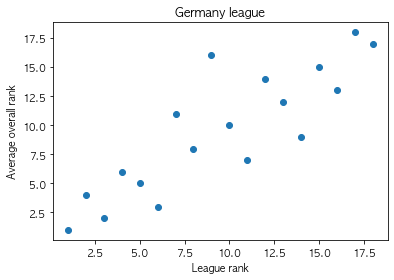

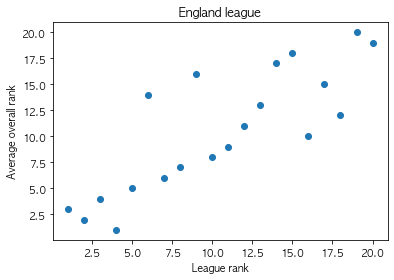

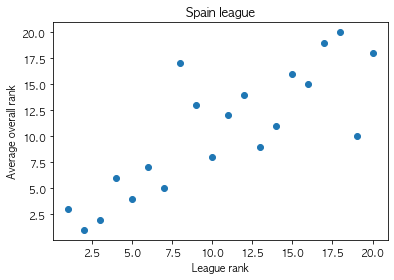

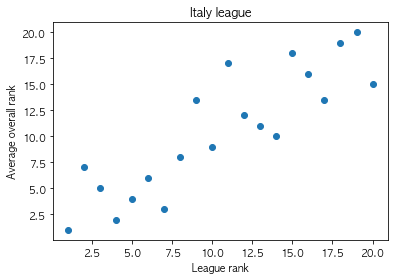

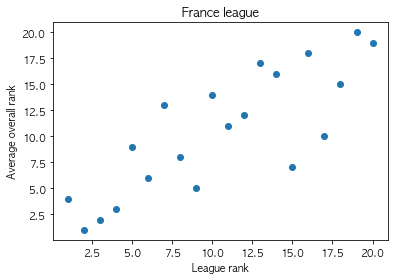

In [21]:
# rank correlation between average overall and each league table
for country,table in league_table.items():
    data_fifa = fifa[fifa['League'] == country].groupby('Team')['Overall'].mean().sort_values(ascending=False).to_frame().reset_index()
    data_real = table
    result = pd.merge(data_fifa,data_real)
    result['Overall_Rank'] = result['Overall'].rank(ascending=False)
    plt.figure()
    plt.scatter(result['Rank'],result['Overall_Rank'],)
    plt.title(country+' league')
    plt.xlabel('League rank')
    plt.ylabel('Average overall rank')
    print(f'{country} League')
    print(scipy.stats.spearmanr(result['Rank'],result['Overall_Rank']))
    print()

### Insight from 4.a.(1)
- Correlation between each league table and average overall per team 
- As we can see from below, all 5 correlation is above 0.8 which is pretty strong enough to convince that there is correlation between league table and overall

### 4.a.(2) Rank correlation between average overall and FIFA nation ranking
- First check whether the country name is in same string
- There are some records in FIFA nation ranking dataset which does not have same country name
- 'Merge' function will handle it by setting how parameter as inner. This will only show results having same country name
- Exactly same procedure as we did in section 4.a.(1)

- When calcuating average overall of each nation, only consider the nations which has more than 23 playes
- Only 23 players are chosen for official match between nations

In [22]:
# codes for check whether the team name is in same string in both FIFA2022 and League table
def check_national_name(x): 
    c = 0
    for name in fifa_ranking['Nationality'].values:
        result = (x['Nationality']==name).sum()
        if result==0:
            c+=1
    print(c)
    
check_national_name(fifa)    

# totally 54 country names are different

54


In [23]:
# Show merging
temp = fifa.groupby('Nationality').apply(lambda x:x['Overall'].sort_values(ascending=False)[0:23].mean() if x['Overall'].size>23 else 0).to_frame()
temp = temp.reset_index()
temp.dropna(inplace=True)
temp.columns = ['Nationality','Overall']

result = pd.merge(temp,fifa_ranking,how='inner')
result = result[result['Overall']!=0]
result['Rank'] = result['Rank'].rank()
result['Overall_Rank'] = result['Overall'].rank(ascending=False)
result = result[['Nationality','Rank','Overall','Overall_Rank']]
result.head()


,Nationality,Rank,Overall,Overall_Rank
1,Albania,56.0,72.000000,48.0
2,Algeria,28.0,76.565217,24.0
6,Argentina,6.0,83.304348,6.0
8,Australia,30.0,71.695652,49.0
9,Austria,27.0,77.565217,19.0


SpearmanrResult(correlation=0.867259993971173, pvalue=2.318824162092276e-21)

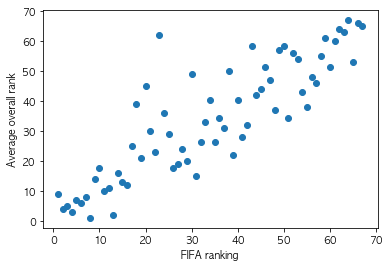

In [24]:
# rank correlation between fifa ranking and average overall 
import scipy
plt.scatter(result['Rank'],result['Overall_Rank'])
plt.xlabel('FIFA ranking')
plt.ylabel('Average overall rank')
scipy.stats.spearmanr(result['Rank'],result['Overall_Rank'])

### Insight from 4.a.(2)
- Also has very strong correlation which is about 0.87

### Troughout the section 4, it seems that the FIFA2022 dataset reflect the real world

<hr style="border:1.5px solid gray"> </hr>

## 5. Analytics
- a. Best league by overall
- b. Best league by financial state
- c. Best league by fostering young players

### 5.a. Best league by overall

#### 5.a.(1) Top-N analysis
- Sorted top 30 teams with highest average overall among 5 major leagues

<AxesSubplot:xlabel='League', ylabel='count'>

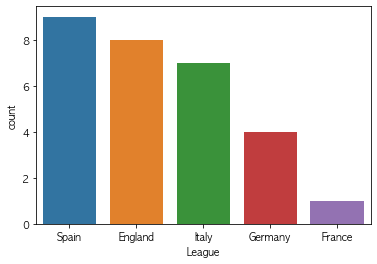

In [25]:
# top 30 highest average overall team distribution

import seaborn as sns
df = fifa[fifa['League']!='Else'].groupby('Team')['Overall'].mean().sort_values(ascending=False).to_frame().reset_index()
df['League']= df['Team'].apply(find_league)

sns.countplot(data = df[1:30],x='League',order=df[1:30]['League'].value_counts().index)

#### Insight from 5.a.(1)
- Spain, England and Italy takes a large part of top 30 teams.

#### 5.a.(2) Distribution of overall by league
- Using 'groupby', possible to calculate aveage overall by each league
- Draw distribution of overall in each league using seaborn
- T-test by using scipy module

In [26]:
fifa[fifa['League']!='Else'].groupby('League')[['Overall']].mean()

,Overall
League,
England,73.007800
France,70.807229
Germany,71.742230
Italy,72.042088
Spain,73.086751


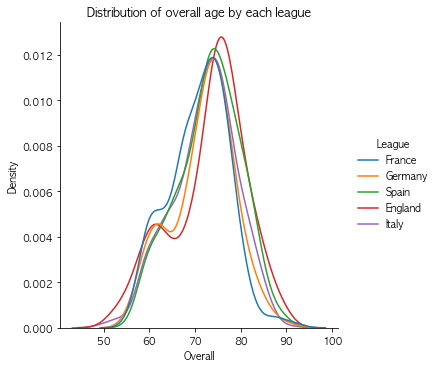

In [27]:
# distribution of overall by league
sns.displot(fifa[fifa['League']!='Else'],x='Overall',hue='League',kind='kde')
plt.title('Distribution of overall age by each league')
plt.show()


# Compare Enalgnd and Spain
# The reason why Spain has the aveage overall in the above table is that- 
# -England has high density for low overall playes. 

#### T tset
- We removed the missing values above for playes who did not get a contract yet
- There could be 2nd team players for each team
- Therefore, we cna consider the FIFA2022 dataset as sample dataset from the population of real world

In [28]:
import scipy
print('T test of average overall between England and Italy')
print(scipy.stats.ttest_ind(fifa['Overall'][fifa['League']=='England'],fifa['Overall'][fifa['League']=='Italy'],alternative='greater'))
print('Alternative hyphothesis is that average overall of England is greater than Italy. And p-value is less than 0.05 .\nTherefore, average overall of Engalnd is larger than Italy')
print()

print('T test of average overall between England and Spain')
print(scipy.stats.ttest_ind(fifa['Overall'][fifa['League']=='England'],fifa['Overall'][fifa['League']=='Spain']))
print('Alternative hyphothesis is that average overall of England is same as Spain. And p-value is larger than 0.05, failing to reject null hyphothesis .\nTherefore, average overall of Engalnd is same as Spain')
print()

T test of average overall between England and Italy
Ttest_indResult(statistic=2.2024718111827712, pvalue=0.013908264616499117)
Alternative hyphothesis is that average overall of England is greater than Italy. And p-value is less than 0.05 .
Therefore, average overall of Engalnd is larger than Italy

T test of average overall between England and Spain
Ttest_indResult(statistic=-0.18446238102347323, pvalue=0.8536801167760014)
Alternative hyphothesis is that average overall of England is same as Spain. And p-value is larger than 0.05, failing to reject null hyphothesis .
Therefore, average overall of Engalnd is same as Spain



#### Insight from 5.a.(2)
- From the table and the graph, Spain and England has the higest average overall
- But from the t-test, it seems both league have similar average overall

#### 5.a.(3) Average Overall by position and league
- Competitive league shoud have good balance between offense and defense abilities
- We simply categorize positions into two tategories; 'Offense' and 'Defense'

In [29]:
position_dic = {'Offense':['RW', 'ST','CM','LW','CF','CAM','RM'],'Defense':['GK','CB','CDM','RB','LB','RWB','LWB']}
def offense_defense(x):
    if x in position_dic['Offense']:
        return 'Offense'
    else: return 'Defense'
fifa['Offense-Defense'] = fifa['Best position'].apply(offense_defense)

fifa[['Best position','Offense-Defense']].head()

,Best position,Offense-Defense
0,RW,Offense
1,ST,Offense
2,ST,Offense
3,GK,Defense
4,CM,Offense


,League,Offense-Defense,Overall
0,England,Defense,73.383978
1,England,Offense,72.519713
2,France,Defense,70.726415
3,France,Offense,70.904943
4,Germany,Defense,72.059406
5,Germany,Offense,71.348361
6,Italy,Defense,72.232704
7,Italy,Offense,71.822464
8,Spain,Defense,73.014085
9,Spain,Offense,73.179211


(0.0, 150.0)

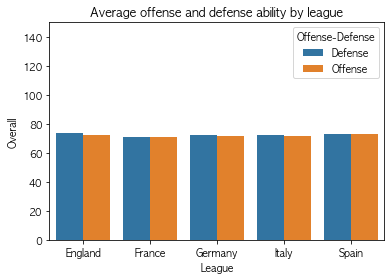

In [30]:
data = fifa[fifa['League']!='Else'].groupby(['League','Offense-Defense'])['Overall'].mean().reset_index()
display(data)

sns.barplot(data=data,x='League',y='Overall',hue='Offense-Defense')
plt.title('Average offense and defense ability by league')
plt.ylim(0,150)

#### Insight from 5.a.(3)
- Still, England and Spain has high average Defense and Offense abilities. 
- And both league have good balance between Defense and Offense abilities.

### 5.b. Best league by financial state
- based on how much wage the league pays for playes

<AxesSubplot:xlabel='Wage', ylabel='League'>

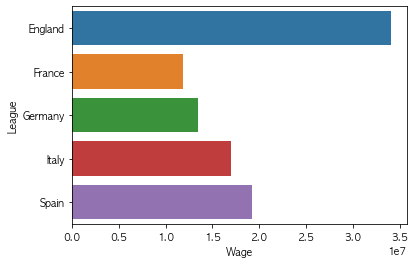

In [31]:
data = fifa[fifa['League']!='Else'].groupby('League')[['Wage']].sum().reset_index()
sns.barplot(data=data,x='Wage',y='League')

#### Insight from 5.b. 
- England pays the most to the players overwhelmingly

### 5.c. Best league by fostering young players

#### 5.c.(1) Distribution of potential of young players

In [32]:
fifa[(fifa['League']!='Else')&(fifa['Young Player']=='Young')].groupby('League')['Potential'].mean()

League
England    78.957364
France     77.347973
Germany    78.470356
Italy      77.160000
Spain      78.334764
Name: Potential, dtype: float64

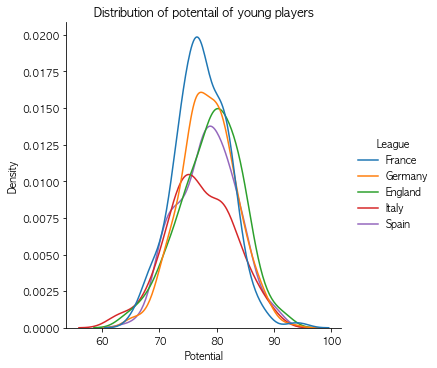

In [33]:
sns.displot(fifa[(fifa['League']!='Else')&(fifa['Young Player']=='Young')],x='Potential',hue='League',kind='kde')
plt.title('Distribution of potentail of young players')
plt.show()

#### Insight from 5.c.(1)
- England and Spain has high potential average among 5 leagues.
- But "potential" is very subjective, it is hard to predict their future. 
- We need to dive more into it

#### 5.c.(2) Average wage for young players by league

In [34]:
display(fifa[(fifa['League']!='Else')&(fifa['Young Player']=='Young')].groupby(['League'])[['Wage']].mean())

,Wage
League,
England,25066.666667
France,12308.614865
Germany,14261.857708
Italy,14884.250000
Spain,15997.854077


#### 5.c.(3) Average overall of young players by league

In [35]:
display(fifa[(fifa['League']!='Else')&(fifa['Young Player']=='Young')].groupby(['League'])[['Overall']].mean())

,Overall
League,
England,66.860465
France,67.489865
Germany,67.699605
Italy,67.020000
Spain,67.519313


#### Insight from 5.c.(2) and 5.c.(3)
- England pays overwhelmingly for the young players
- But average overall of young players in England league is the lowest
- Rest of the laegus have somewhat similar average overall and wage

#### 5.c.(4) Distribution of age of young players by league

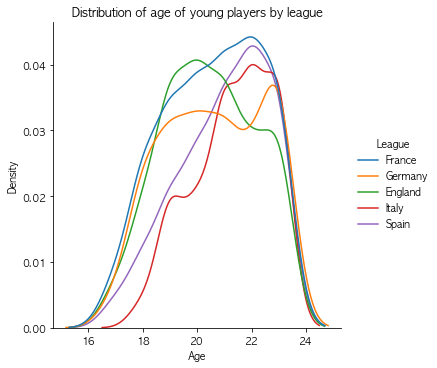

In [36]:
sns.displot(fifa[(fifa['League']!='Else')&(fifa['Young Player']=='Young')],x='Age',hue='League',kind='kde')
plt.title('Distribution of age of young players by league')
plt.show()

#### Insight from 5.c.(4)
- We alreday saw average overall of young players in England is the lowest, even though England pays the most
- The reason is that Englad has high the density for the palyes below 20s.
- The Enlgand league invest in the players who are very young and talentd

Throughout section 5.c., England league has the higest average potential for young players and pays the most for them.\n But the average overall of young players in England leaguep is the lowest. This is because England league invest in lots of very young playes below 20s